In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import *
from collections import Counter
import pickle as pkl
import gradio as gr

# ========== LOAD DATA ==========

In [2]:
imsData = pd.read_csv("ikimina_loan_Dataset.csv")
imsData

,MemberID,SavingFrequency,SavingTimesPerPeriod,TotalSavingCycles,CompletedSavingCycles,UserSavingsMade,TotalCurrentSaving,IkiminaCreatedYear,UserJoinedYear,EmploymentStatus,HasGuardian,Age,RecentLoanPaymentStatus,SavingStatus,SavingRatingFactor,SavingRatio,ExpectedLoan,BoostAmount,AllowedLoan
0,1,daily,1,365,238,49,8300204,2019,2023,employed,True,19,Excellent,Poor,0.2,0.21,2545860.89,876343.08,3422203.97
1,2,daily,1,365,217,80,1872561,2020,2020,employed,True,19,Excellent,Poor,0.2,0.37,629939.88,267035.00,896974.87
2,3,daily,1,365,317,42,9755468,2018,2018,employed,True,19,Excellent,Poor,0.2,0.13,2246527.33,713910.24,2960437.57
3,4,daily,1,365,197,30,9335973,2022,2022,employed,True,19,Excellent,Poor,0.2,0.15,3459522.99,1584663.48,5044186.47
4,5,daily,1,365,122,113,4927418,2016,2017,employed,True,19,Excellent,Better,0.8,0.93,11793492.26,5651048.38,9854836.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,34996,monthly,15,180,41,37,3893735,2016,2020,unemployed,False,11,Poor,Better,0.8,0.90,13675557.07,4159648.61,7787470.00
34996,34997,monthly,15,180,58,12,8873260,2015,2018,unemployed,False,11,Poor,Poor,0.2,0.21,5507540.69,1734875.32,7242416.01
34997,34998,monthly,15,180,156,72,9455844,2016,2022,unemployed,False,11,Poor,Bad,0.4,0.46,4364235.69,516154.80,4880390.49
34998,34999,monthly,15,180,41,9,5415526,2016,2017,unemployed,False,11,Poor,Poor,0.2,0.22,4755096.00,1565219.10,6320315.10


In [3]:
imsData

,MemberID,SavingFrequency,SavingTimesPerPeriod,TotalSavingCycles,CompletedSavingCycles,UserSavingsMade,TotalCurrentSaving,IkiminaCreatedYear,UserJoinedYear,EmploymentStatus,HasGuardian,Age,RecentLoanPaymentStatus,SavingStatus,SavingRatingFactor,SavingRatio,ExpectedLoan,BoostAmount,AllowedLoan
0,1,daily,1,365,238,49,8300204,2019,2023,employed,True,19,Excellent,Poor,0.2,0.21,2545860.89,876343.08,3422203.97
1,2,daily,1,365,217,80,1872561,2020,2020,employed,True,19,Excellent,Poor,0.2,0.37,629939.88,267035.00,896974.87
2,3,daily,1,365,317,42,9755468,2018,2018,employed,True,19,Excellent,Poor,0.2,0.13,2246527.33,713910.24,2960437.57
3,4,daily,1,365,197,30,9335973,2022,2022,employed,True,19,Excellent,Poor,0.2,0.15,3459522.99,1584663.48,5044186.47
4,5,daily,1,365,122,113,4927418,2016,2017,employed,True,19,Excellent,Better,0.8,0.93,11793492.26,5651048.38,9854836.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,34996,monthly,15,180,41,37,3893735,2016,2020,unemployed,False,11,Poor,Better,0.8,0.90,13675557.07,4159648.61,7787470.00
34996,34997,monthly,15,180,58,12,8873260,2015,2018,unemployed,False,11,Poor,Poor,0.2,0.21,5507540.69,1734875.32,7242416.01
34997,34998,monthly,15,180,156,72,9455844,2016,2022,unemployed,False,11,Poor,Bad,0.4,0.46,4364235.69,516154.80,4880390.49
34998,34999,monthly,15,180,41,9,5415526,2016,2017,unemployed,False,11,Poor,Poor,0.2,0.22,4755096.00,1565219.10,6320315.10


In [4]:
print(imsData[['MemberID', 'SavingFrequency', 'TotalCurrentSaving', 'ExpectedLoan', 'BoostAmount', 'AllowedLoan']].head(10))


   MemberID SavingFrequency  TotalCurrentSaving  ExpectedLoan  BoostAmount  \
0         1           daily             8300204    2545860.89    876343.08   
1         2           daily             1872561     629939.88    267035.00   
2         3           daily             9755468    2246527.33    713910.24   
3         4           daily             9335973    3459522.99   1584663.48   
4         5           daily             4927418   11793492.26   5651048.38   
5         6           daily             3316742    1729444.04    558981.02   
6         7           daily             3619147    4516200.53   1449223.38   
7         8           daily                   0          0.00         0.00   
8         9           daily              583230    1851121.30    816476.72   
9        10           daily             6407965    4822489.12   2185190.38   

   AllowedLoan  
0   3422203.97  
1    896974.87  
2   2960437.57  
3   5044186.47  
4   9854836.00  
5   2288425.06  
6   5965423.91  
7    

In [5]:
print(imsData.isnull().sum())


MemberID                   0
SavingFrequency            0
SavingTimesPerPeriod       0
TotalSavingCycles          0
CompletedSavingCycles      0
UserSavingsMade            0
TotalCurrentSaving         0
IkiminaCreatedYear         0
UserJoinedYear             0
EmploymentStatus           0
HasGuardian                0
Age                        0
RecentLoanPaymentStatus    0
SavingStatus               0
SavingRatingFactor         0
SavingRatio                0
ExpectedLoan               0
BoostAmount                0
AllowedLoan                0
dtype: int64


In [6]:
print(imsData.columns.tolist())

['MemberID', 'SavingFrequency', 'SavingTimesPerPeriod', 'TotalSavingCycles', 'CompletedSavingCycles', 'UserSavingsMade', 'TotalCurrentSaving', 'IkiminaCreatedYear', 'UserJoinedYear', 'EmploymentStatus', 'HasGuardian', 'Age', 'RecentLoanPaymentStatus', 'SavingStatus', 'SavingRatingFactor', 'SavingRatio', 'ExpectedLoan', 'BoostAmount', 'AllowedLoan']


In [7]:
imsData

,MemberID,SavingFrequency,SavingTimesPerPeriod,TotalSavingCycles,CompletedSavingCycles,UserSavingsMade,TotalCurrentSaving,IkiminaCreatedYear,UserJoinedYear,EmploymentStatus,HasGuardian,Age,RecentLoanPaymentStatus,SavingStatus,SavingRatingFactor,SavingRatio,ExpectedLoan,BoostAmount,AllowedLoan
0,1,daily,1,365,238,49,8300204,2019,2023,employed,True,19,Excellent,Poor,0.2,0.21,2545860.89,876343.08,3422203.97
1,2,daily,1,365,217,80,1872561,2020,2020,employed,True,19,Excellent,Poor,0.2,0.37,629939.88,267035.00,896974.87
2,3,daily,1,365,317,42,9755468,2018,2018,employed,True,19,Excellent,Poor,0.2,0.13,2246527.33,713910.24,2960437.57
3,4,daily,1,365,197,30,9335973,2022,2022,employed,True,19,Excellent,Poor,0.2,0.15,3459522.99,1584663.48,5044186.47
4,5,daily,1,365,122,113,4927418,2016,2017,employed,True,19,Excellent,Better,0.8,0.93,11793492.26,5651048.38,9854836.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,34996,monthly,15,180,41,37,3893735,2016,2020,unemployed,False,11,Poor,Better,0.8,0.90,13675557.07,4159648.61,7787470.00
34996,34997,monthly,15,180,58,12,8873260,2015,2018,unemployed,False,11,Poor,Poor,0.2,0.21,5507540.69,1734875.32,7242416.01
34997,34998,monthly,15,180,156,72,9455844,2016,2022,unemployed,False,11,Poor,Bad,0.4,0.46,4364235.69,516154.80,4880390.49
34998,34999,monthly,15,180,41,9,5415526,2016,2017,unemployed,False,11,Poor,Poor,0.2,0.22,4755096.00,1565219.10,6320315.10


# ========== ENCODE season and location_type AS INTEGERS ==========

In [8]:
# 2. Encode categorical columns
categorical_cols = ['SavingFrequency', 'RecentLoanPaymentStatus', 'SavingStatus', 'EmploymentStatus']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    imsData[col] = le.fit_transform(imsData[col]) + 1
    label_encoders[col] = le

In [9]:
imsData["HasGuardian"] = imsData["HasGuardian"].astype(int)


In [10]:
imsData

,MemberID,SavingFrequency,SavingTimesPerPeriod,TotalSavingCycles,CompletedSavingCycles,UserSavingsMade,TotalCurrentSaving,IkiminaCreatedYear,UserJoinedYear,EmploymentStatus,HasGuardian,Age,RecentLoanPaymentStatus,SavingStatus,SavingRatingFactor,SavingRatio,ExpectedLoan,BoostAmount,AllowedLoan
0,1,1,1,365,238,49,8300204,2019,2023,1,1,19,3,4,0.2,0.21,2545860.89,876343.08,3422203.97
1,2,1,1,365,217,80,1872561,2020,2020,1,1,19,3,4,0.2,0.37,629939.88,267035.00,896974.87
2,3,1,1,365,317,42,9755468,2018,2018,1,1,19,3,4,0.2,0.13,2246527.33,713910.24,2960437.57
3,4,1,1,365,197,30,9335973,2022,2022,1,1,19,3,4,0.2,0.15,3459522.99,1584663.48,5044186.47
4,5,1,1,365,122,113,4927418,2016,2017,1,1,19,3,2,0.8,0.93,11793492.26,5651048.38,9854836.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,34996,2,15,180,41,37,3893735,2016,2020,2,0,11,5,2,0.8,0.90,13675557.07,4159648.61,7787470.00
34996,34997,2,15,180,58,12,8873260,2015,2018,2,0,11,5,4,0.2,0.21,5507540.69,1734875.32,7242416.01
34997,34998,2,15,180,156,72,9455844,2016,2022,2,0,11,5,1,0.4,0.46,4364235.69,516154.80,4880390.49
34998,34999,2,15,180,41,9,5415526,2016,2017,2,0,11,5,4,0.2,0.22,4755096.00,1565219.10,6320315.10


# Exploratory Data Analysis

# ========== SELECT FEATURES AND TARGET ==========

In [11]:
# 3. Define features and target
features = [
    'SavingFrequency', 'SavingTimesPerPeriod', 'TotalCurrentSaving',
    'CompletedSavingCycles', 'UserSavingsMade',
    'HasGuardian', 'RecentLoanPaymentStatus', 'UserJoinedYear',
    'IkiminaCreatedYear'
]
target = 'AllowedLoan'

X = imsData[features]
y = imsData[target]

In [12]:
X

,SavingFrequency,SavingTimesPerPeriod,TotalCurrentSaving,CompletedSavingCycles,UserSavingsMade,HasGuardian,RecentLoanPaymentStatus,UserJoinedYear,IkiminaCreatedYear
0,1,1,8300204,238,49,1,3,2023,2019
1,1,1,1872561,217,80,1,3,2020,2020
2,1,1,9755468,317,42,1,3,2018,2018
3,1,1,9335973,197,30,1,3,2022,2022
4,1,1,4927418,122,113,1,3,2017,2016
...,...,...,...,...,...,...,...,...,...
34995,2,15,3893735,41,37,0,5,2020,2016
34996,2,15,8873260,58,12,0,5,2018,2015
34997,2,15,9455844,156,72,0,5,2022,2016
34998,2,15,5415526,41,9,0,5,2017,2016


In [13]:
y

0        3422203.97
1         896974.87
2        2960437.57
3        5044186.47
4        9854836.00
            ...    
34995    7787470.00
34996    7242416.01
34997    4880390.49
34998    6320315.10
34999    2227616.08
Name: AllowedLoan, Length: 35000, dtype: float64

# ========== SPLIT DATA ==========

In [14]:
# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ========== Train models ==========

In [15]:
X_test

,SavingFrequency,SavingTimesPerPeriod,TotalCurrentSaving,CompletedSavingCycles,UserSavingsMade,HasGuardian,RecentLoanPaymentStatus,UserJoinedYear,IkiminaCreatedYear
17813,2,8,3484715,48,31,0,4,2023,2017
6857,3,2,4473865,90,22,0,2,2018,2018
7672,3,2,3161753,36,29,0,4,2024,2017
9704,3,2,2257092,43,39,1,5,2018,2015
14303,2,14,7952018,133,62,1,5,2022,2015
...,...,...,...,...,...,...,...,...,...
8045,3,2,7851526,16,14,1,1,2020,2020
33786,2,15,6213580,103,50,1,1,2016,2015
13208,2,14,8450013,19,4,1,1,2020,2017
24073,2,11,8458014,57,11,0,5,2018,2017


### ========== MODEL 1: Random Forest ==========

In [16]:
randomModel = RandomForestRegressor(n_estimators=100, random_state=42)

In [17]:
randomModel.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Predict
randomModel_pred = randomModel.predict(X_test)    

In [19]:
# Evaluate using accuracy, precision, recall, Support and F1-score.
mae = mean_absolute_error(y_test, randomModel_pred)
mse = mean_squared_error(y_test, randomModel_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, randomModel_pred)
print("📊 Random Forest Model Evaluation Metrics")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Coefficient of Determination (R² Score): {r2:.2f}")


📊 Random Forest Model Evaluation Metrics
Mean Absolute Error (MAE): 356408.72
Mean Squared Error (MSE): 389184813054.13
Root Mean Squared Error (RMSE): 623846.79
Coefficient of Determination (R² Score): 0.98



### ========== MODEL 2: LinearRegression ==========

In [20]:
LinearRegrModel = LinearRegression()
LinearRegrModel.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict class labels for test set
LinearRegrModel_pred = LinearRegrModel.predict(X_test)

In [22]:
mae = mean_absolute_error(y_test, LinearRegrModel_pred)
mse = mean_squared_error(y_test, LinearRegrModel_pred)
rmse = mean_squared_error(y_test, LinearRegrModel_pred, squared=False)
r2 = r2_score(y_test, LinearRegrModel_pred)


print("📊 LinearRegression Model Evaluation Metrics")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

📊 LinearRegression Model Evaluation Metrics
Mean Absolute Error (MAE): 2262779.67
Mean Squared Error (MSE): 8883841833048.75
Root Mean Squared Error (RMSE): 2980577.43
R² Score: 0.64


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### ========== MODEL 3: XGBoost ==========

In [23]:
XGBModel = XGBRegressor(random_state=42)
XGBModel.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [24]:
# Predict
XGBModel_pred = XGBModel.predict(X_test)   

In [25]:
mae = mean_absolute_error(y_test, XGBModel_pred)
mse = mean_squared_error(y_test, XGBModel_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, XGBModel_pred)

print("📊 XGBoost Regression Model Evaluation Metrics")
print(f"MAE (Mean Absolute Error)       : {mae:.4f}")
print(f"MSE (Mean Squared Error)        : {mse:.4f}")
print(f"RMSE (Root Mean Squared Error)  : {rmse:.4f}")
print(f"R² Score (Coefficient of Determination): {r2:.4f}")

📊 XGBoost Regression Model Evaluation Metrics
MAE (Mean Absolute Error)       : 478990.2235
MSE (Mean Squared Error)        : 546420394209.1616
RMSE (Root Mean Squared Error)  : 739202.5394
R² Score (Coefficient of Determination): 0.9780


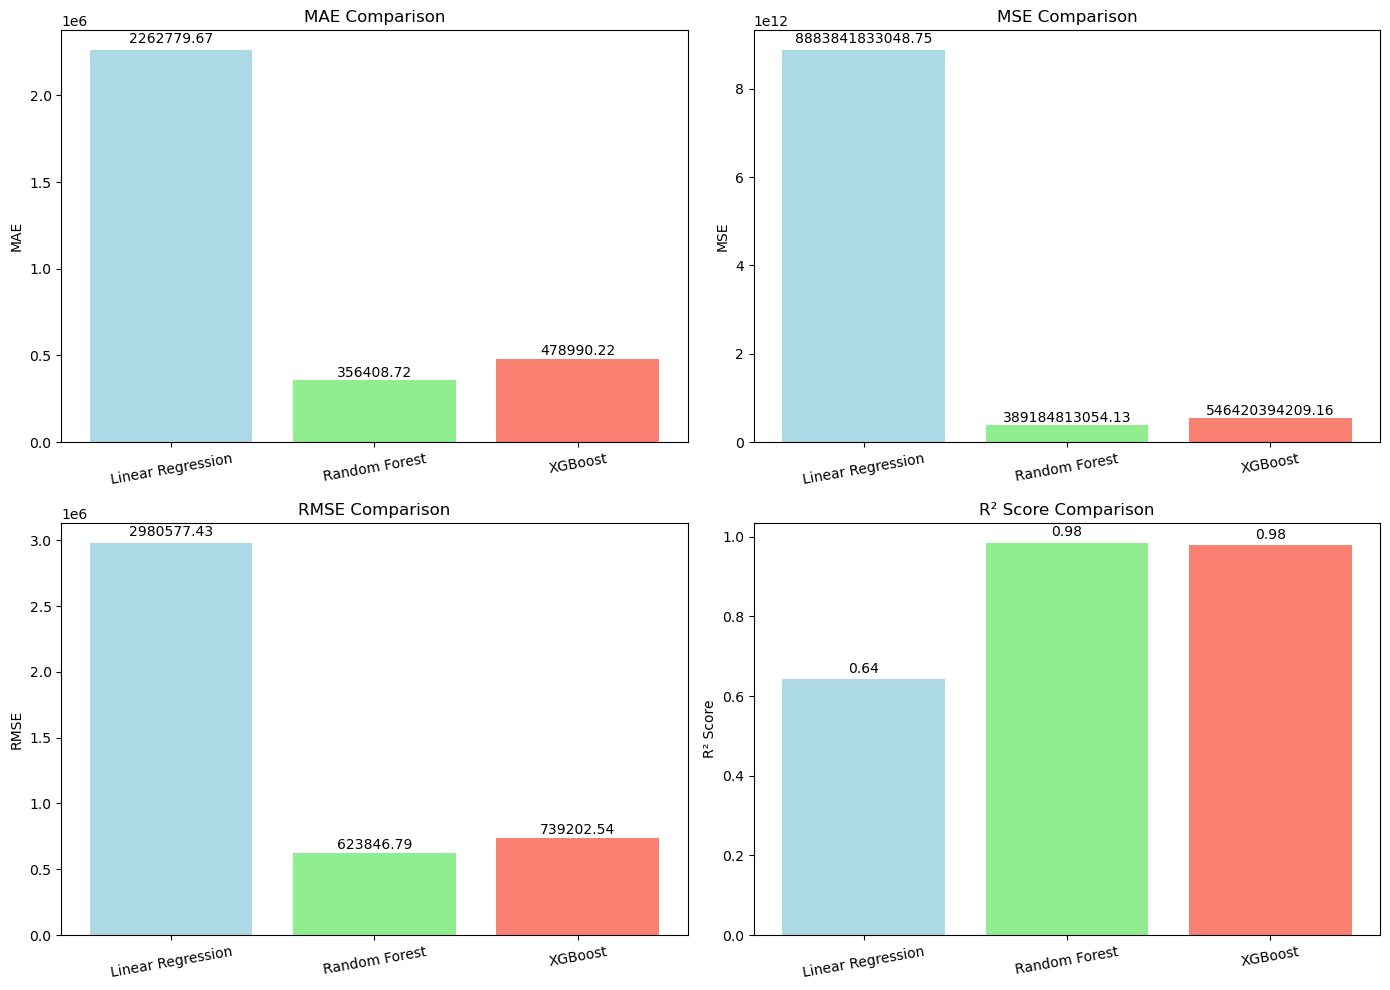

In [26]:
# Step 1: Evaluate metrics for each model
def evaluate_metrics(name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return {
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Example: compute for each model
linear_metrics = evaluate_metrics("Linear Regression", y_test, LinearRegrModel_pred)
rf_metrics = evaluate_metrics("Random Forest", y_test, randomModel_pred)
xgb_metrics = evaluate_metrics("XGBoost", y_test, XGBModel_pred)

# Step 2: Organize results
model_names = [linear_metrics['Model'], rf_metrics['Model'], xgb_metrics['Model']]
mae_scores = [linear_metrics['MAE'], rf_metrics['MAE'], xgb_metrics['MAE']]
mse_scores = [linear_metrics['MSE'], rf_metrics['MSE'], xgb_metrics['MSE']]
rmse_scores = [linear_metrics['RMSE'], rf_metrics['RMSE'], xgb_metrics['RMSE']]
r2_scores = [linear_metrics['R2'], rf_metrics['R2'], xgb_metrics['R2']]

results = {
    "MAE": mae_scores,
    "MSE": mse_scores,
    "RMSE": rmse_scores,
    "R² Score": r2_scores
}

# Step 3: Plot metrics
colors = ['lightblue', 'lightgreen', 'salmon']
plt.figure(figsize=(14, 10))

for i, (metric_name, scores) in enumerate(results.items(), 1):
    ax = plt.subplot(2, 2, i)
    bars = ax.bar(range(len(model_names)), scores, color=colors)
    ax.set_title(f"{metric_name} Comparison")
    ax.set_ylabel(metric_name)
    ax.set_xticks(range(len(model_names)))  # ✅ Fix: set ticks before labels
    ax.set_xticklabels(model_names, rotation=10)  # ✅ Set labels after ticks
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h + 0.01*h, f"{h:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig("Model_Regression_Metric_Comparison.png", dpi=300)
plt.show()


In [27]:
print(imsData.columns.tolist())


['MemberID', 'SavingFrequency', 'SavingTimesPerPeriod', 'TotalSavingCycles', 'CompletedSavingCycles', 'UserSavingsMade', 'TotalCurrentSaving', 'IkiminaCreatedYear', 'UserJoinedYear', 'EmploymentStatus', 'HasGuardian', 'Age', 'RecentLoanPaymentStatus', 'SavingStatus', 'SavingRatingFactor', 'SavingRatio', 'ExpectedLoan', 'BoostAmount', 'AllowedLoan']


In [28]:
pkl.dump(randomModel, open('randomModel_Loan_prediction_model.pkl', 'wb'))

In [29]:
pkl.dump(LinearRegrModel, open('LinearRegrModel_Loan_prediction_model.pkl', 'wb'))

In [30]:
pkl.dump(XGBModel, open('XGBModel_Loan_prediction_model.pkl', 'wb'))

In [31]:
randomModel = pkl.load(open('randomModel_Loan_prediction_model.pkl', 'rb'))

In [32]:
XGBModel = pkl.load(open('XGBModel_Loan_prediction_model.pkl', 'rb'))

In [33]:
LinearRegrModel = pkl.load(open('LinearRegrModel_Loan_prediction_model.pkl', 'rb'))


In [34]:
randomModel

RandomForestRegressor(random_state=42)

In [35]:
LinearRegrModel

LinearRegression()

In [36]:
XGBModel

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [37]:
import gradio as gr
import pandas as pd
import pickle as pkl

# Load models (ensure these files exist in your directory)
randomModel = pkl.load(open('randomModel_Loan_prediction_model.pkl', 'rb'))
xgbModel = pkl.load(open('xgbModel_Loan_prediction_model.pkl', 'rb'))
linearRegrModel = pkl.load(open('LinearRegrModel_Loan_prediction_model.pkl', 'rb'))

# Maps to encode categorical inputs
saving_frequency_map = {'daily': 0, 'weekly': 1, 'monthly': 2}
employment_status_map = {'employed': 1, 'unemployed': 0}
recent_loan_payment_map = {'Excellent': 4, 'Better': 3, 'Good': 2, 'Bad': 1, 'Poor': 0}
guardian_map = {True: 1, False: 0}

feature_columns = [
    'SavingFrequency',
    'SavingTimesPerPeriod',
    'TotalCurrentSaving',
    'CompletedSavingCycles',
    'UserSavingsMade',
    'HasGuardian',
    'RecentLoanPaymentStatus',
    'UserJoinedYear',
    'IkiminaCreatedYear',
    
]

def predict_loan(saving_frequency, saving_times_per_period, total_current_saving,
                 completed_saving_cycles, user_savings_made,
                 has_guardian, recent_loan_payment_status, user_joined_year,
                 ikimina_created_year, model_choice):
    try:
        # Validate numeric inputs are non-negative
        for name, value in {
            "Saving Times Per Period": saving_times_per_period,
            "Total Current Saving": total_current_saving,
            "Completed Saving Cycles": completed_saving_cycles,
            "User Savings Made": user_savings_made,
            "User Joined Year": user_joined_year,
            "Ikimina Created Year": ikimina_created_year,
           
        }.items():
            if value < 0:
                return f"❌ {name} must be a non-negative number."

        # Validate User Joined Year >= Ikimina Created Year
        if user_joined_year < ikimina_created_year:
            return "❌ User Joined Year cannot be earlier than Ikimina Created Year."

        # Validate SavingTimesPerPeriod based on SavingFrequency
        saving_times_per_period = int(saving_times_per_period)
        if saving_frequency == 'daily':
            if saving_times_per_period != 1:
                return "❌ For daily saving frequency, 'Saving Times Per Period' must be exactly 1."
        elif saving_frequency == 'weekly':
            if saving_times_per_period < 1 or saving_times_per_period > 7:
                return "❌ For weekly saving frequency, 'Saving Times Per Period' must be between 1 and 7."
        elif saving_frequency == 'monthly':
            if saving_times_per_period < 1 or saving_times_per_period > 31:
                return "❌ For monthly saving frequency, 'Saving Times Per Period' must be between 1 and 31."
        else:
            return "❌ Invalid saving frequency."

        # Prepare encoded input
        data = {
            'SavingFrequency': saving_frequency_map[saving_frequency],
            'SavingTimesPerPeriod': saving_times_per_period,
            'TotalCurrentSaving': float(total_current_saving),
            'CompletedSavingCycles': int(completed_saving_cycles),
            'UserSavingsMade': int(user_savings_made),
            'HasGuardian': guardian_map[has_guardian],
            'RecentLoanPaymentStatus': recent_loan_payment_map[recent_loan_payment_status],
            'UserJoinedYear': int(user_joined_year),
            'IkiminaCreatedYear': int(ikimina_created_year),
           
        }

        df = pd.DataFrame([data], columns=feature_columns)

        # Model selection
        if model_choice == 'Random Forest':
            model = randomModel
        elif model_choice == 'XGBoost':
            model = xgbModel
        elif model_choice == 'Linear Regression':
            model = linearRegrModel
        else:
            return "❌ Invalid model selected."

        # Prediction
        pred = model.predict(df)[0]
        pred_formatted = f"{pred:,.2f} RWF"

        return f"✅ Predicted Allowed Loan: {pred_formatted}"

    except Exception as e:
        return f"❌ Error during prediction: {str(e)}"


iface = gr.Interface(
    fn=predict_loan,
    inputs=[
        gr.Radio(['daily', 'monthly', 'weekly'], label="Saving Frequency", value="daily"),
        gr.Number(value=0, label="Saving Times Per Period", precision=0),
        gr.Number(value=0, label="Total Current Saving"),
        gr.Number(value=0, label="Completed Saving Cycles", precision=0),
        gr.Number(value=0, label="User Savings Made", precision=0),
        gr.Checkbox(label="Has Guardian", value=False),
        gr.Radio(['Excellent', 'Better', 'Good', 'Bad', 'Poor'], label="Recent Loan Payment Status", value="Excellent"),
        gr.Number(value=2020, label="User Joined Year", precision=0),
        gr.Number(value=2015, label="Ikimina Created Year", precision=0),
        gr.Radio(['Random Forest', 'XGBoost', 'Linear Regression'], label="Select Model", value="Random Forest"),
    ],
    outputs=gr.Textbox(label="Loan Prediction Result"),
    title="IMS Loan Allowed Prediction",
    description="Predict the allowed loan amount for an IMS user based on saving and personal features with input validation."
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
